# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [15]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [18]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [28]:
print(X_train.shape[0])
print(X_test.shape[0])
print(X_train.shape[1] * X_train.shape[2])
print(X_train[0].size)

60000
10000
784
784


In [31]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

In [39]:
X_train[0].ndim

2

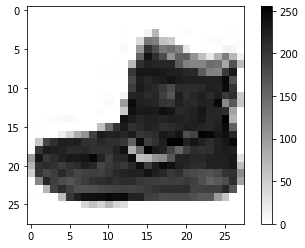

In [38]:
plt.imshow(X_train[0], cmap="binary")
plt.colorbar()

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [41]:
X_train.min()

0

In [42]:
X_train = X_train/255
X_test = X_test/255

In [44]:
X_train.min()

0.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

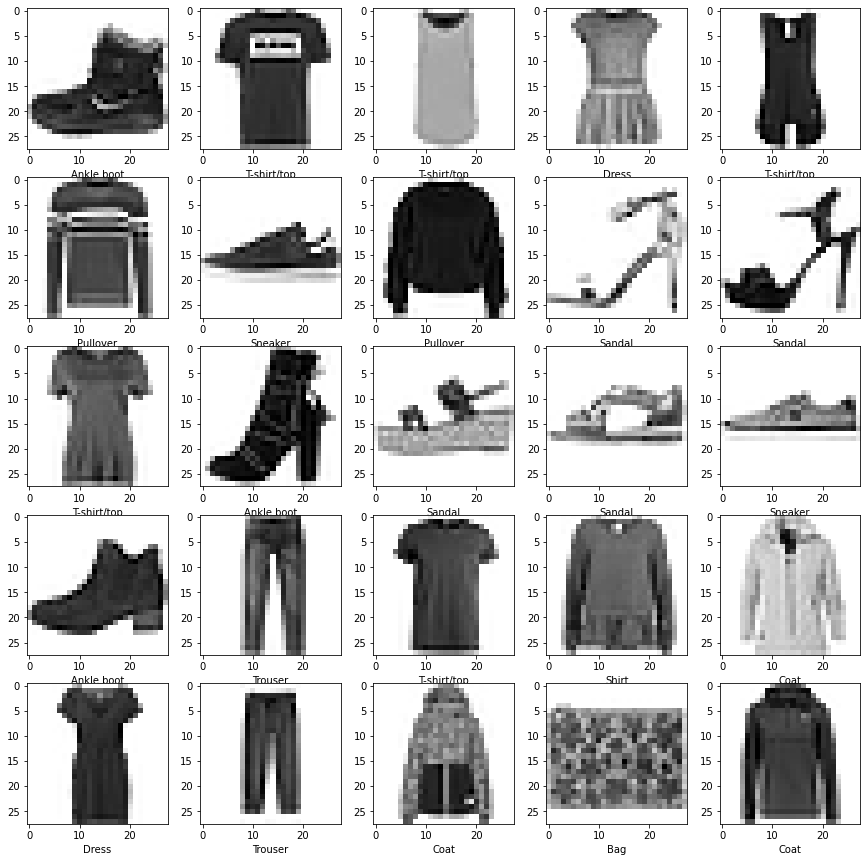

In [48]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [51]:
model.compile(optimizer='sgd',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [54]:
784 * 128 + 128

100480

In [55]:
128*64 + 64

8256

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [58]:
60000*0.8/32

1500.0

In [59]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7809 - accuracy: 0.7462 - val_loss: 0.5424 - val_accuracy: 0.8130
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5115 - accuracy: 0.8231 - val_loss: 0.4778 - val_accuracy: 0.8316
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4630 - accuracy: 0.8376 - val_loss: 0.4494 - val_accuracy: 0.8407
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4346 - accuracy: 0.8485 - val_loss: 0.4304 - val_accuracy: 0.8505
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4138 - accuracy: 0.8554 - val_loss: 0.4525 - val_accuracy: 0.8345
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3978 - accuracy: 0.8605 - val_loss: 0.4074 - val_accuracy: 0.8556
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3835 - accuracy: 0.8662 - val_loss: 0.3923 - val_accuracy:

<AxesSubplot:>

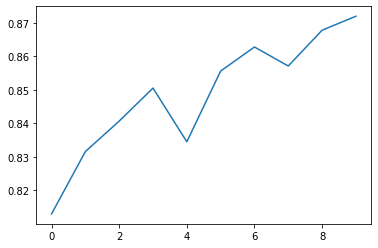

In [65]:
pd.DataFrame(history.history)['val_accuracy'].plot()

In [66]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3454 - accuracy: 0.8781 - val_loss: 0.3692 - val_accuracy: 0.8710
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3399 - accuracy: 0.8786 - val_loss: 0.3721 - val_accuracy: 0.8703
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3324 - accuracy: 0.8808 - val_loss: 0.3567 - val_accuracy: 0.8758
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3259 - accuracy: 0.8835 - val_loss: 0.3637 - val_accuracy: 0.8735
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3196 - accuracy: 0.8862 - val_loss: 0.3463 - val_accuracy: 0.8785
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8882 - val_loss: 0.3461 - val_accuracy: 0.8781
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8884 - val_loss: 0.3445 - val_accuracy:

<AxesSubplot:>

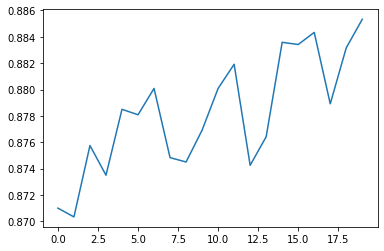

In [68]:
pd.DataFrame(history.history)['val_accuracy'].plot()

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [69]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8772


[0.3400871455669403, 0.8772000074386597]

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [73]:
y_pred = model.predict(X_test)
y_pred[0]

array([1.5619607e-05, 9.2929815e-07, 4.4787110e-05, 3.0710548e-06,
       5.8946457e-06, 8.5571045e-03, 2.8847100e-05, 2.5688777e-02,
       4.3840145e-04, 9.6521664e-01], dtype=float32)

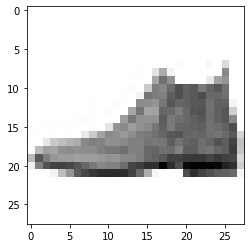

In [76]:
plt.imshow(X_test[0], cmap="binary")

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [85]:
y_pred[0]

array([1.5619607e-05, 9.2929815e-07, 4.4787110e-05, 3.0710548e-06,
       5.8946457e-06, 8.5571045e-03, 2.8847100e-05, 2.5688777e-02,
       4.3840145e-04, 9.6521664e-01], dtype=float32)

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [ ]:
print("Prediccion:", class_names[np.argmax(y_pred[0])])
print("Valor etiqueta:", class_names[y_test[0]])

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

In [86]:
np.argmax(y_pred[0])

9

In [87]:
y_test[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

In [88]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

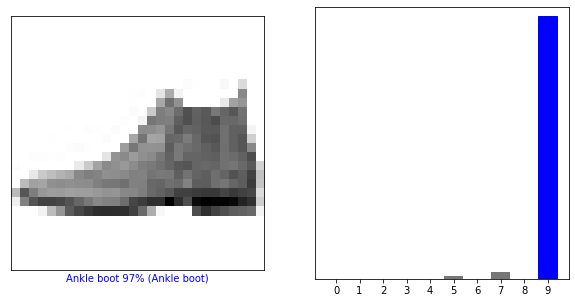

In [93]:
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, y_pred[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, y_pred[i], y_test)
plt.show()

In [95]:
class_names[7]

'Sneaker'

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

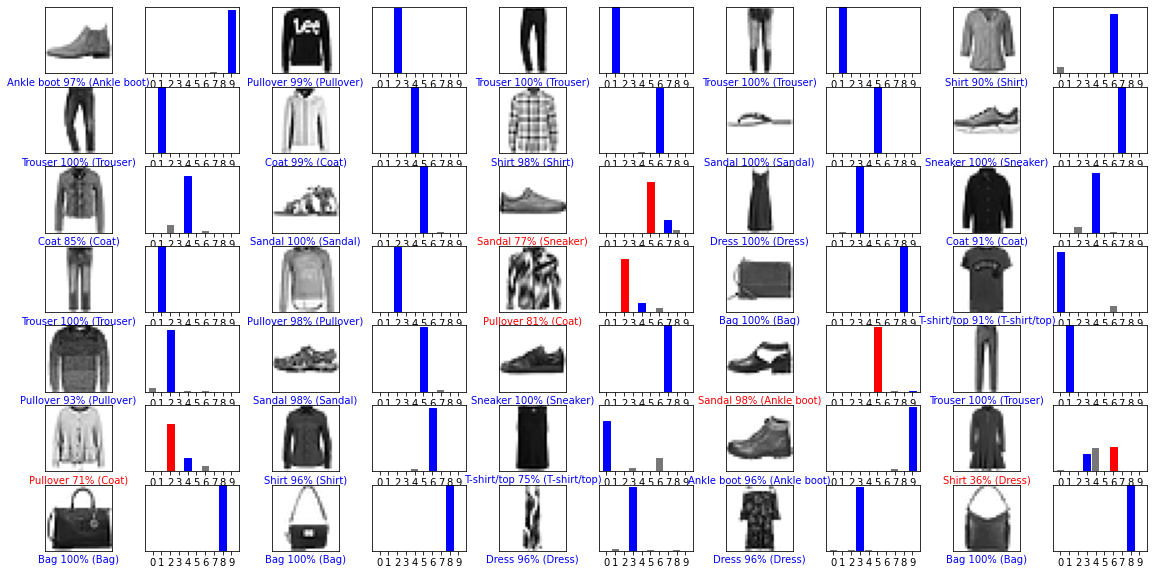

In [100]:

n_rows = 7
n_cols = 5
n_im = n_rows * n_cols
plt.figure(figsize=(20,10))

for i in range(n_im):
    plt.subplot(n_rows, n_cols*2 , 2*i + 1)
    plot_image(i, y_pred[i], y_test, X_test)
    plt.subplot(n_rows, n_cols*2, 2*i + 2)
    plot_value_array(i, y_pred[i], y_test)

plt.show()

Evalúa tu modelo con una matriz de confusión e interprétala.

In [107]:
pred_labels = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
pred_labels

[9,
 2,
 1,
 1,
 6,
 1,
 4,
 6,
 5,
 7,
 4,
 5,
 5,
 3,
 4,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 6,
 0,
 9,
 6,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 6,
 7,
 6,
 7,
 2,
 1,
 2,
 6,
 4,
 2,
 5,
 8,
 2,
 2,
 8,
 6,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 3,
 4,
 7,
 8,
 7,
 0,
 2,
 6,
 2,
 3,
 1,
 2,
 8,
 4,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 4,
 2,
 3,
 6,
 7,
 6,
 7,
 8,
 5,
 5,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 6,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 2,
 1,
 5,
 4,
 1,
 9,
 1,
 8,
 4,
 6,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 3,
 5,
 6,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 4,
 7,
 4,
 2,
 0,
 5,
 6,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 6,
 7,
 9,
 9,
 4,
 4,
 7,
 1,
 2,
 3,
 6,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 4,
 0,
 7,
 9,
 8,
 4,
 1,
 8,
 4,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 3,
 0,
 7,
 7,
 6,
 6,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 4,
 9,
 2,
 2,
 8,
 6,
 4,
 2,
 4,


In [102]:
y_pred

array([[1.56196074e-05, 9.29298153e-07, 4.47871098e-05, ...,
        2.56887767e-02, 4.38401446e-04, 9.65216637e-01],
       [2.41952748e-05, 1.38374201e-09, 9.88454580e-01, ...,
        4.92583676e-13, 1.70571390e-09, 7.31162906e-13],
       [2.85043752e-05, 9.99970555e-01, 6.28838279e-08, ...,
        7.23555113e-12, 1.71237744e-08, 4.15408776e-14],
       ...,
       [1.45215238e-03, 9.39157587e-08, 9.75784787e-04, ...,
        1.92575881e-05, 9.81600106e-01, 5.17752174e-10],
       [1.46595012e-05, 9.99644041e-01, 9.67101755e-07, ...,
        2.11647180e-08, 3.52364424e-07, 1.09201125e-07],
       [2.34200306e-05, 3.51406470e-06, 5.30780817e-05, ...,
        3.27382307e-03, 1.83986835e-04, 1.24362021e-04]], dtype=float32)

In [108]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
c_mat

array([[0.816, 0.001, 0.012, 0.039, 0.002, 0.002, 0.119, 0.   , 0.009,
        0.   ],
       [0.001, 0.964, 0.002, 0.028, 0.002, 0.   , 0.003, 0.   , 0.   ,
        0.   ],
       [0.014, 0.001, 0.776, 0.016, 0.111, 0.   , 0.08 , 0.   , 0.002,
        0.   ],
       [0.02 , 0.008, 0.012, 0.892, 0.031, 0.   , 0.033, 0.   , 0.004,
        0.   ],
       [0.   , 0.001, 0.088, 0.029, 0.806, 0.001, 0.073, 0.   , 0.002,
        0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.   , 0.965, 0.   , 0.019, 0.002,
        0.013],
       [0.113, 0.001, 0.07 , 0.034, 0.066, 0.   , 0.707, 0.   , 0.009,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.035, 0.   , 0.938, 0.   ,
        0.027],
       [0.007, 0.   , 0.004, 0.006, 0.006, 0.005, 0.013, 0.005, 0.954,
        0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.   , 0.007, 0.001, 0.037, 0.   ,
        0.954]])

<AxesSubplot:>

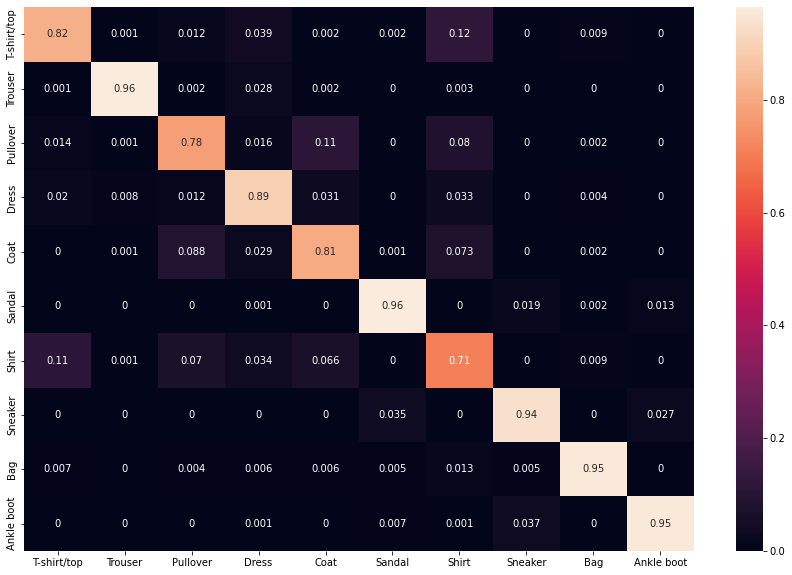

In [111]:
plt.figure(figsize=(15,10))
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [112]:
class_names[np.argmax(model.predict(X_test[0:1]))]

'Ankle boot'